In [1]:
# coding: utf-8

# https://www.python.org/dev/peps/pep-0008#introduction<BR>
# http://scikit-learn.org/<BR>
# http://pandas.pydata.org/<BR>

#%%
import numpy as np
import pandas as pd
import pylab as plt

In [2]:
### Fetch the data and load it in pandas
data = pd.read_csv('train.csv')
print("Size of the data: ", data.shape)

#%%
# See data (five rows) using pandas tools
#print data.head(2)

Size of the data:  (15120, 56)


In [3]:
data.head(5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
### Prepare input to scikit and train and test cut

binary_data = data[np.logical_or(data['Cover_Type'] == 1, data['Cover_Type'] == 2)] # two-class classification set
X = binary_data.drop('Cover_Type', axis=1).values
y = binary_data['Cover_Type'].values
print(np.unique(y))
y = 2 * y - 3 # converting labels from [1,2] to [-1,1]

[1 2]


In [5]:
#%%
# Import cross validation tools from scikit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

In [6]:
#%%
### Train a single decision tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8)

# Train the classifier and print training time
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [7]:
#%%
# Do classification on the test dataset and print classification results
from sklearn.metrics import classification_report
target_names = data['Cover_Type'].unique().astype(str).sort()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          -1       0.74      0.82      0.78       416
           1       0.81      0.73      0.77       448

    accuracy                           0.77       864
   macro avg       0.78      0.78      0.77       864
weighted avg       0.78      0.77      0.77       864



In [8]:
#%%
# Compute accuracy of the classifier (correctly classified instances)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7743055555555556


In [9]:
import matplotlib.pyplot as plt

In [10]:
w = np.ones(X_train.shape[0]) / X_train.shape[0] # weight initialization

In [101]:
X_train.shape

(3456, 55)

In [12]:
w.shape

(3456,)

In [14]:
base_classifier=DecisionTreeClassifier(max_depth=2,criterion='gini')
base_classifier.fit(X_train,y_train,sample_weight=w)
    
Y_pred=base_classifier.predict(X_test)

In [16]:
type(Y_pred)

numpy.ndarray

In [22]:
comp=np.array(Y_pred==y_test)

In [33]:
temp_index=np.where((Y_pred==y_test)==False)[0]

In [42]:
len(np.where((Y_pred==y_test)==False)[0])

204

In [46]:
t_error=sum(w[temp_index])

In [41]:
w.shape

(3456,)

In [45]:
import math

In [47]:
alpha=0.5*math.log((1-t_error)/t_error)

In [48]:
alpha

1.3844527384117409

In [51]:
true_index=np.where((Y_pred==y_test)==True)[0]

In [78]:
a=[[1,-1,1],
   [-1,1,1]]

In [79]:
len(a)

2

In [80]:
a=np.array(a)

In [61]:
b=[10,100]

In [105]:
X_test.shape

(864, 55)

0.2508680555555556
0.2508680555555556
0.2508680555555556
0.2488425925925926
0.2427662037037037
0.2387152777777778
0.23697916666666666
0.2361111111111111
0.2361111111111111
0.23842592592592593
0.23177083333333334
0.23177083333333334
0.23234953703703703
0.23148148148148148
0.23234953703703703
0.23350694444444445
0.23177083333333334
0.22974537037037038
0.21903935185185186
0.21961805555555555
0.2193287037037037
0.21903935185185186
0.21672453703703703
0.21903935185185186
0.21730324074074073
0.2126736111111111
0.21498842592592593
0.21296296296296297
0.2126736111111111
0.21383101851851852


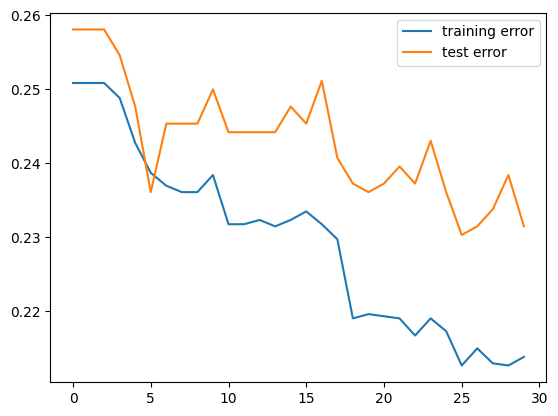

In [178]:
D = 2 # tree depth
T = 30 # number of trees
w = np.ones(X_train.shape[0]) / X_train.shape[0] # weight initialization
training_scores = np.zeros(X_train.shape[0]) # init scores with 0
test_scores     = np.zeros(X_test.shape[0])

# init errors
training_errors = []
test_errors = []

# we will make T trees
for t in range(T):
    # initialize the classifier (i.e. the tree)
    clf = DecisionTreeClassifier(max_depth=D)
    # fit with weights
    clf.fit(X_train, y_train, sample_weight=w)
    # predict with tree
    y_pred = clf.predict(X_train)
    # check where clf was wrong
    indicator = np.not_equal(y_pred, y_train)
    # calculate gamma and alpha with equations from doc
    gamma = w[indicator].sum() / w.sum()
    alpha = np.log((1-gamma) / gamma)
    #print(alpha)
    # update weights
    w *= np.exp(alpha * indicator) 
    #print(w)
    
    # calculate scores and errors for this tree
    training_scores += alpha * y_pred
    training_error = 1. * len(training_scores[training_scores * y_train < 0]) / len(X_train)
    print(training_error)
    # calculate test error and score
    y_test_pred = clf.predict(X_test)
    test_scores += alpha * y_test_pred
    test_error = 1. * len(test_scores[test_scores * y_test < 0]) / len(X_test)
    #print(t, ": ", alpha, gamma, training_error, test_error)
    
    training_errors.append(training_error)
    test_errors.append(test_error)
    
plt.plot(training_errors, label="training error")
plt.plot(test_errors, label="test error")
plt.legend()
plt.show()

In [10]:
import math

[-1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -

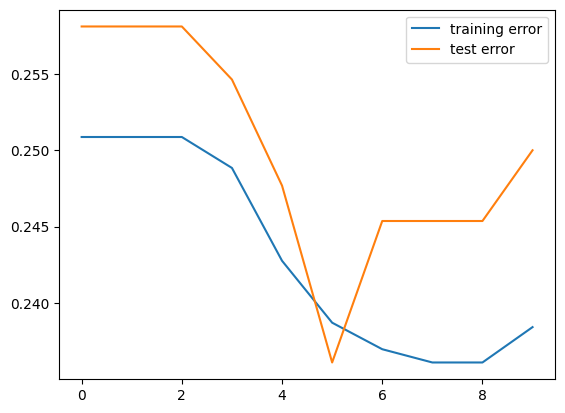

In [15]:
#===================================================================
#%%
### Train AdaBoost

# Your first exercise is to program AdaBoost.
# You can call *DecisionTreeClassifier* as above, 
# but you have to figure out how to pass the weight vector (for weighted classification) 
# to the *fit* function using the help pages of scikit-learn. At the end of 
# the loop, compute the training and test errors so the last section of the code can 
# plot the lerning curves. 
# 
# Once the code is finished, play around with the hyperparameters (D and T), 
# and try to understand what is happening.

D = 2 # tree depth
T = 10 # number of trees
w = np.ones(X_train.shape[0]) / X_train.shape[0] # weight initialization
training_scores = np.zeros(X_train.shape[0]) # init scores with 0
test_scores     = np.zeros(X_test.shape[0])
 
# init errors
training_errors = []
test_errors = []
alpha=[]
Y_pred=[]
y_test_pred=[]

#===============================
for t in range(T):
    base_classifier=DecisionTreeClassifier(max_depth=2,criterion='gini')
    base_classifier.fit(X_train,y_train,sample_weight=w)
    Y_pred.append(base_classifier.predict(X_train))
    mis_index=np.where((Y_pred[t]==y_train)==False)[0]
    true_index=np.where((Y_pred[t]==y_train)==True)[0]
    indicator = np.not_equal(Y_pred[t], y_train)
    t_error=w[mis_index].sum()/w.sum()
    alpha.append(np.log((1-t_error)/t_error))
    #print(alpha)
    for i in mis_index:
        w[i]=w[i]*math.exp(alpha[t])
    
    # calculate scores and errors for this tree
    training_scores += alpha[t] * Y_pred[t]
    #print(training_scores)
    training_error =  len(training_scores[training_scores * y_train < 0]) / len(X_train)
    #print(training_error)
    # calculate test error and score
    y_test_pred.append(base_classifier.predict(X_test))
    test_scores += alpha[t] * y_test_pred[t]
    test_error = 1. * len(test_scores[test_scores * y_test < 0]) / len(X_test)
    #print(t, ": ", alpha, gamma, training_error, test_error)
    
    training_errors.append(training_error)
    test_errors.append(test_error)
        
# Your code should go here
Y_final_pred= list((np.array(alpha).reshape(1,-1))@(np.array(Y_pred)))

Y_final_pred=Y_final_pred[0]

Y_final_pred=[1 if i>=0 else -1 for i in Y_final_pred]

print(Y_final_pred)
   

#===============================

#  Plot training and test error    
plt.plot(training_errors, label="training error")
plt.plot(test_errors, label="test error")
plt.legend()

In [164]:
w[indicator].sum()

0.4350307776947351

2
3
4
5
6
7
8
9
10
11
12
13
14
15


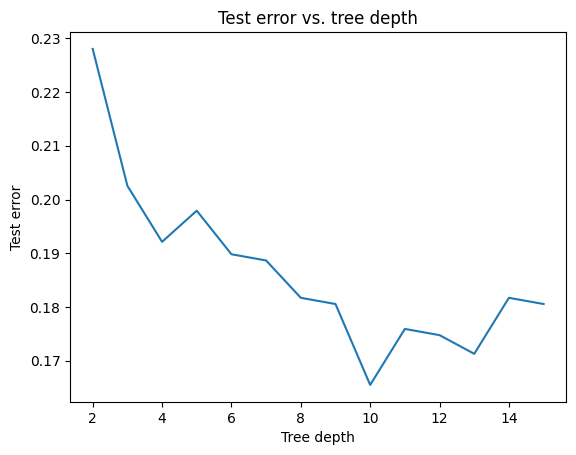

In [192]:
#===================================================================
#%%
### Optional part
### Optimize AdaBoost

# Your final exercise is to optimize the tree depth in AdaBoost. 
# Copy-paste your AdaBoost code into a function, and call it with different tree depths 
# and, for simplicity, with T = 100 iterations (number of trees). Plot the final 
# test error vs the tree depth. Discuss the plot.

#===============================

# Your code should go here

def adaboost(D,T):
    w = np.ones(X_train.shape[0]) / X_train.shape[0] # weight initialization
    training_scores = np.zeros(X_train.shape[0]) # init scores with 0
    test_scores     = np.zeros(X_test.shape[0])
    
    # init errors
    training_errors = []
    test_errors = []
    alpha=[]
    Y_pred=[]
    y_test_pred=[]

    #===============================
    for t in range(T):
        base_classifier=DecisionTreeClassifier(max_depth=D,criterion='gini')
        base_classifier.fit(X_train,y_train,sample_weight=w)
        Y_pred.append(base_classifier.predict(X_train))
        mis_index=np.where((Y_pred[t]==y_train)==False)[0]
        true_index=np.where((Y_pred[t]==y_train)==True)[0]
        indicator = np.not_equal(Y_pred[t], y_train)
        t_error=w[mis_index].sum()/w.sum()
        alpha.append(np.log((1-t_error)/t_error))
        #print(alpha)
        for i in mis_index:
            w[i]=w[i]*math.exp(alpha[t])
        
        # calculate scores and errors for this tree
        training_scores += alpha[t] * Y_pred[t]
        #print(training_scores)
        training_error = 1. * len(training_scores[training_scores * y_train < 0]) / len(X_train)
        #print(training_error)
        # calculate test error and score
        y_test_pred.append(base_classifier.predict(X_test))
        test_scores += alpha[t] * y_test_pred[t]
        test_error = 1. * len(test_scores[test_scores * y_test < 0]) / len(X_test)
        #print(t, ": ", alpha, gamma, training_error, test_error)
        
        training_errors.append(training_error)
        test_errors.append(test_error)
        
    return test_error
    
    
    
    

#===============================

Ds = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
final_test_errors = []
for D in Ds:
    print(D)
    final_test_errors.append(adaboost(D, 100))


plt.plot(Ds, final_test_errors)
plt.title("Test error vs. tree depth")
plt.ylabel("Test error")
plt.xlabel("Tree depth")
plt.show()